# Content Based Filtering

In Content-based recommendations, similarities between items are calculated, and recommendations are based on the similarities between the items. The description given to the item is considered along with the user's previous choices and opinions.  The algorithm tries to match and recommend items that are like those which are rated highly by the user. The characteristics of the items are to be known to perform Content-based filtering. <br>

In this case, the tags assigned to books and the authors of the books are considered. A text corpus of this information is created for each book in the dataset. The TF-IDF (Term Frequency- Inverse Document Frequency) approach is used to weight the tags based on their frequency in the corpus. It is also known as Vector Space Representation. Cosine similarity is calculated between books based on the created vector. The calculated cosine similarity is used to recommend a book based on a previously highly rated book. The book that has the highest cosine similarity value with the previously liked book will be recommended to the user. In this approach, more than one previously rated book is considered, and more than one recommendation is made based on their cosine similarity values.

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator

In [4]:
book_tags = pd.read_csv('data/book_tags.csv')
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
tags = pd.read_csv('data/tags.csv')
to_read = pd.read_csv('data/to_read.csv')

Join tags & books_tags

In [5]:
tags_join = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


Join tags_join to books

In [6]:
books_tags_join = pd.merge(books, tags_join, left_on='book_id', right_on='goodreads_book_id', how='inner')
books_tags_join.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,33114,25968,young-adult


Join all the tags assigned to each book

In [7]:
books_tags_joined = books_tags_join.groupby('book_id')['tag_name'].apply(' '.join)
books_tags_joined.head()

book_id
1    to-read fantasy favorites currently-reading yo...
2    to-read fantasy favorites currently-reading yo...
3    to-read fantasy favorites currently-reading yo...
5    to-read fantasy favorites currently-reading yo...
6    to-read fantasy young-adult fiction harry-pott...
Name: tag_name, dtype: object

Join the collection of tags to books.csv

In [8]:
books_collection_tags = pd.merge(books, books_tags_joined, left_on='book_id', right_on='book_id', how='inner')
books_collection_tags

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,to-read favorites currently-reading young-adul...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,to-read favorites currently-reading young-adul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,to-read fantasy favorites currently-reading fi...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read favorites currently-reading books-i-ow...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,to-read favorites currently-reading fiction bo...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,to-read favorites currently-reading books-i-ow...


# TF-IDF: Transform text to feature vectors

To create a corpus of text data as an additional column

In [9]:
books_collection_tags['corpus'] = (pd.Series(books_collection_tags[['authors', 'tag_name']].values.tolist()).str.join(' '))

In [10]:
books_collection_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
id                           10000 non-null int64
book_id                      10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

Books are identified based on the title of the book. Therefore, an array of book titles is created

In [11]:
books_titles = books_collection_tags['title']

TF-IDF

In [12]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_collection_tags['corpus'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

The cosine similarity for all the books is calculated. The books can now be recommended based on the cosine similarity.

# User-oriented Content Based Recommendation System

The Groupby function is used to group the ratings given by each user

In [13]:
rat = ratings.groupby('user_id', as_index=False)

A recommendation function to recommend a book based on the user_id by considering the top 3 highly rated books by that user. user_id ia taken as input. The book_ids of the books for which the user gave ratings are found out. The ids for top 3 rated books are selected. For each book_id, five books with highest cosine similarity value are found. The list of 15 book ids are sorted by cosine similarity values in ascending order. The top 5 book ids are selected and are suggested to the user.
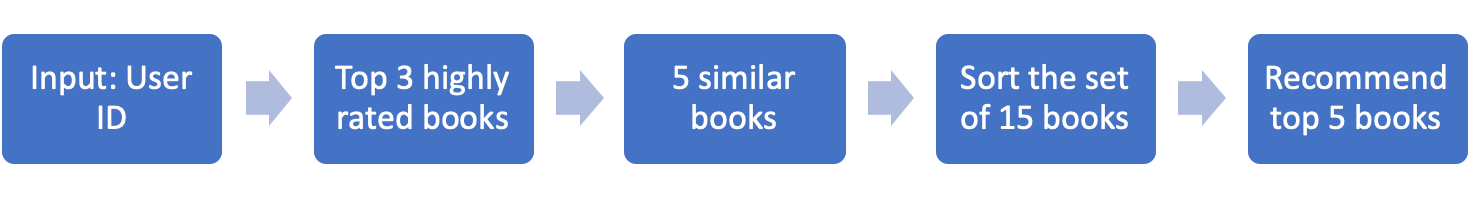

In [17]:
def recommend_user(id):
    x = rat.get_group(id).sort_values('rating', ascending=False).head(3)
    book_id_column = x.loc[:,'book_id']
    book_ids = book_id_column.values
    cos_sim_values = []
    for i in book_ids:
        ind = pd.Series(books_collection_tags.index, index=books_collection_tags['id'])
        y = ind[i]
        cos_sim = list(enumerate(cosine_sim[y]))
        cos_sim = sorted(cos_sim, key=lambda x: x[1], reverse=True)
        cos_sim = cos_sim[0:5]
        cos_sim_values = cos_sim_values + cos_sim
    cos_sim_values = sorted(cos_sim_values, key=operator.itemgetter(1), reverse = True)
    cos_sim_values_top = cos_sim_values[0:5]
    books_recom = [i[0] for i in cos_sim_values_top]
    index_list_books_recom = [x - 1 for x in books_recom] #To correct to the index of each book
    return books_collection_tags['title'].iloc[index_list_books_recom]

In [18]:
x = recommend_user(2372)
x

4832              Rock Hard (Sinners on Tour, #2)
4768                      The Bastard of Istanbul
4704                      Outpost (Razorland, #2)
2278    Neither Here nor There: Travels in Europe
1368                               Bud, Not Buddy
Name: title, dtype: object

A new function is defined to recommend book_id instead of title.

In [19]:
def recommend_user_book_id(id):
    x = rat.get_group(id).sort_values('rating', ascending=False).head(3)
    book_id_column = x.loc[:,'book_id']
    book_ids = book_id_column.values
    cos_sim_values = []
    for i in book_ids:
        ind = pd.Series(books_collection_tags.index, index=books_collection_tags['id'])
        y = ind[i]
        cos_sim = list(enumerate(cosine_sim[y]))
        cos_sim = sorted(cos_sim, key=lambda x: x[1], reverse=True)
        cos_sim = cos_sim[0:5]
        cos_sim_values = cos_sim_values + cos_sim
    cos_sim_values = sorted(cos_sim_values, key=operator.itemgetter(1), reverse = True)
    cos_sim_values_top = cos_sim_values[0:5]
    books_recom = [i[0] for i in cos_sim_values_top]
    return books_collection_tags['id'].iloc[books_recom]

In [20]:
y = recommend_user_book_id(2372)
y

4833    4834
4769    4770
4705    4706
2279    2280
1369    1370
Name: id, dtype: int64

In [21]:
import random
import recmetrics

recmetrics is an open-source Python library of evaluation metrics for recommendation systems

In [22]:
random_nums = random.sample(range(1, 53425), 1000)

In [23]:
l = []
for i in random_nums:
    m = list(recommend_user_book_id(i))
    l.append(m)

In [24]:
p = recmetrics.personalization(l)
p

0.9989578264661447

The high value of Personalization score indates that the recommendation system is offering a personalized recommendation to each user.

References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.linear_kernel.html
3. https://github.com/statisticianinstilettos/recmetrics
4. https://docs.python.org/3/library/operator.html
5. https://docs.python.org/3/library/random.html